# Christofer Nicholas Japri (220711803)
# Pandas - Klasifikasi 3 jenis succulent (echeveria, aloe, vera, sedum)

## AlexNet

In [815]:
#Import library
import os
import numpy as np

#Import library tensorflow dan modul keras yang diperlukan
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

#Penjelasan
# layers digunakan untuk menambahkan lapisan ke dalam model
# load_img digunakan untuk memuat gambar
# ImageDataGenerator digunakan untuk melakukan augmentasi pada gambar
# Sequential digunakan untuk membuat model secara berurutan
# Conv2D digunakan untuk membuat lapisan konvolusi
# MaxPooling2D digunakan untuk melakukan pooling pada lapisan konvolusi
# Dense digunakan untuk membuat lapisan fully connected
# Dropout digunakan untuk menghindari overfitting
# Flatten digunakan untuk membuat lapisan menjadi flat (rata) menjadi vektor 1 dimensi


In [816]:
count = 0 #digunakan untuk menghitung jumlah gambar
dirs = os.listdir(r"C:\Users\H P\OneDrive\Documents\mldl\UAS\train_data")
for dir in dirs:
    files = list(os.listdir(r"C:\Users\H P\OneDrive\Documents\mldl\UAS\train_data/"+dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print('Images Folder has ' + str(count) + ' Images')

Aloevera Folder has 90 Images
Echeveria Folder has 90 Images
Sedum Folder has 90 Images
Images Folder has 270 Images


In [817]:
# Parameter
base_dir = r"C:\Users\H P\OneDrive\Documents\mldl\UAS\train_data"
img_size = 180 #mengubah ukuran gambar menjadi 180
batch = 16 #jumlah sample (gambar) yang akan diproses pada satu kali iterasi
validation_split = 0.1 #data pelatihan yang akan digunakan sebagai data validasi

In [818]:
dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir, #path direktori, subfolder dianggap sebagai label
    seed=123, #untuk memastikan proses pemisahan data selalu konsisten (random_state)
    image_size=(img_size, img_size), #ukuran gambar diubah (resize) menjadi 180x180 pixel
    batch_size=batch, #jumlah gambar yang akan dikelompokkan 
)

Found 270 files belonging to 3 classes.


In [819]:
#mendapatkan nama kelas dari dataset 
class_names = dataset.class_names #dataset.class_names akan mengambil daftar nama kelas berdasarkan subfolder di dalam direktori
print("Class Names:", class_names)

Class Names: ['Aloevera', 'Echeveria', 'Sedum']


In [820]:
total_count = len(dataset) #menghitung jumlah total gambar dalam dataset
val_count = int(total_count * validation_split) #menghitung jumlah gambar untuk validasi
train_count = total_count - val_count # menghitung jumlah gambar untuk train

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)

Total Images: 17
Train Images: 16
Validation Images: 1


In [821]:
train_ds = dataset.take(train_count) #digunakan untuk mengambil (take) sejumlah batch sebanyak 'train count' yang pertama dari data set
val_ds = dataset.skip(train_count) #digunakan untuk melewati (skip) sejumlah batch sebanyak 'train count' yang pertama dari data set

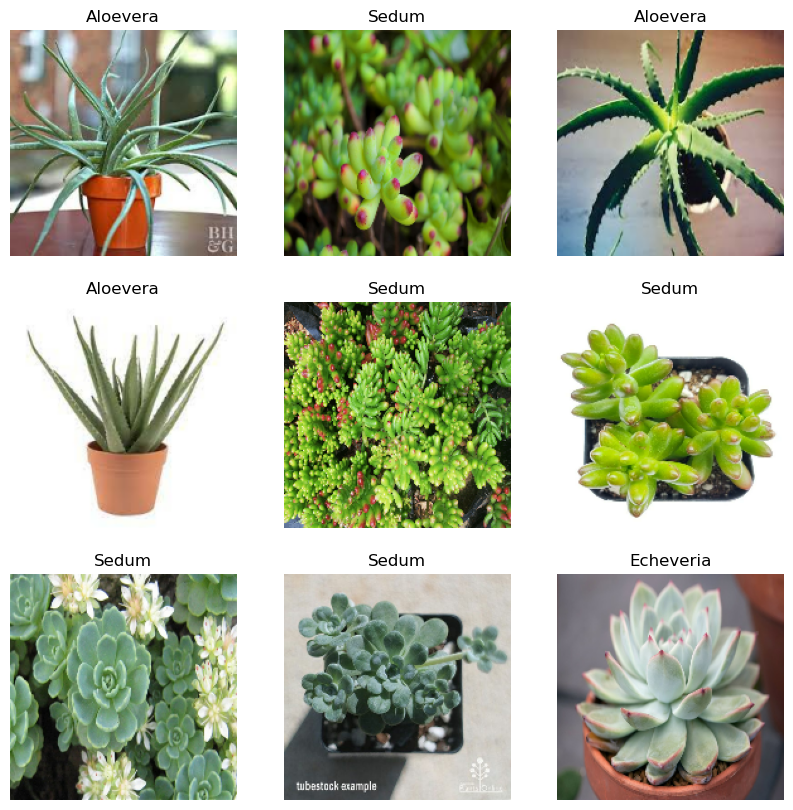

In [822]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10)) #membuat figure dengan ukuran 10x10 inchi untuk menampilkan gambar

for images, labels in train_ds.take(1): #mengambil 1 batch pertama dari train_ds
    for i in range(9): #iterasi untuk menampilkan 9 hambar pertama dalam batch
        plt.subplot(3,3, i+1) #menyiapkan subplot dengan grid 3x3 dan menempatkan gambar pada posisi i+1
        plt.imshow(images[i].numpy().astype('uint8')) #menampilkan gambar dan mengonversi ke tipe uint8
        plt.title(class_names[labels[i]]) #menampilkan judul gambar sesuai dengan nama kelas
        plt.axis('off') #menonaktifkan sumbu pada gambar agar tidak terlihat

In [823]:
import numpy as np

# Tampilkan gambar dengan shape (16, 180, 180, 3)
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)  # Output: (16, 180, 180, 3)
    #16: Jumlah gambar dalam batch.
    #180: Lebar gambar dalam piksel
    #180: Tinggi gambar dalam piksel
    #3: Jumlah channel gambar (RGB)

(16, 180, 180, 3)


In [824]:
#Mengatur AUTOTUNE untuk pemrosesan data otomatis oleh tensorflow
#AUTOTUNE digunakan untuk memungkinkan tensorflow mengoptimalkan jumlah thread secara otomatis saat memproses data
AUTOTUNE = tf.data.AUTOTUNE

In [825]:
#mengoptimalkan dataset pelatihan (train_ds)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
#cache digunakan untuk menyimpan dataser di memori agar lebih cepat diakses
#shuffle mengacak data dalam batch agar model tidak terlalu terlatih pada urutan tertentu
#prefetch untuk menyiapkan data batch berikutnya secara otomatis

In [826]:
#mengoptimalkan dataset validasi (val_ds) 
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [827]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)), #membalik gambar secara horizontal
    layers.RandomRotation(0.1), #merotasi gambar secara acak dalam kisaran 0°-36° (0.1 * 360)
    layers.RandomZoom(0.1) #melakukan zoom in/zoom out secara acak dengan rentang 10%
])

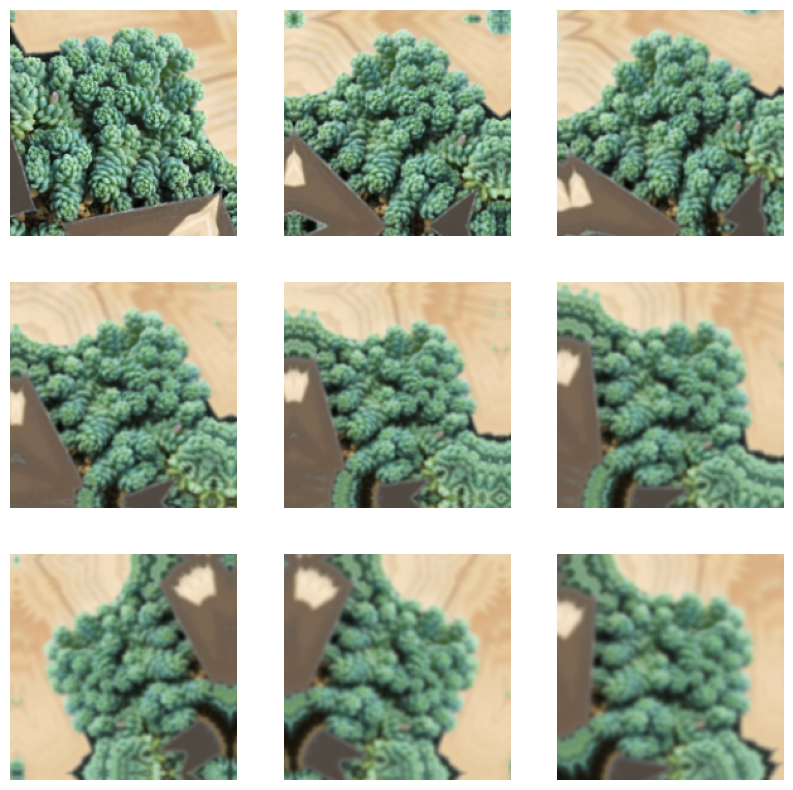

In [828]:
#sama seperti sebelumnya, code ini digunakan untuk menampilkan gambar dari data_augmentation
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [829]:
import tensorflow as tf
import keras

import keras._tf_keras.keras.backend as K
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Input, Dense, Conv2D
from keras._tf_keras.keras.layers import Flatten, MaxPool2D, AvgPool2D
from keras._tf_keras.keras.layers import Concatenate, Dropout, BatchNormalization

from keras._tf_keras.keras.models import load_model

#membuat model from scratch 
def alexnet(input_shape, n_classes):
    input = Input(input_shape)

    x = Conv2D(96, kernel_size=(11, 11), strides=(4, 4), padding='valid', activation='relu')(input)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)
    x = BatchNormalization()(x)

    x = Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)
    x = BatchNormalization()(x)

    x = Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)
    x = BatchNormalization()(x)

    x = Flatten()(x)

    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = BatchNormalization()(x)

    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = BatchNormalization()(x)

    output = Dense(n_classes, activation='softmax')(x)

    model = Model(input, output)
    return model

#Pastikan input shae dan jumlah kelas sesuai
input_shape = (180, 180, 3)
n_classes = 3

#Clear Cache Keras menggunakan clear session
K.clear_session()
#buat model dengan 
model = alexnet(input_shape, n_classes)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 43, 43, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 21, 21, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 21, 21, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 10, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 37,360,387 (142.52 MB)

 Trainable params: 37,341,251 (142.45 MB)

 Non-trainable params: 19,136 (74.75 KB)

In [830]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
#Coimpile dengan optimizer adam
model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#buat early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=5, 
                               mode='max')
#fit validation data ke dalam model
history= model.fit(train_ds, 
                   epochs=30, 
                   validation_data=val_ds, 
                   callbacks=[early_stopping])

Epoch 1/30


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 411ms/step - accuracy: 0.3195 - loss: 1.5544 - val_accuracy: 0.2143 - val_loss: 1.8490
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 393ms/step - accuracy: 0.6375 - loss: 0.9731 - val_accuracy: 0.3571 - val_loss: 1.1702
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - accuracy: 0.6770 - loss: 0.7289 - val_accuracy: 0.4286 - val_loss: 1.0485
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 389ms/step - accuracy: 0.7598 - loss: 0.5786 - val_accuracy: 0.4286 - val_loss: 0.9924
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 372ms/step - accuracy: 0.8306 - loss: 0.4887 - val_accuracy: 0.6429 - val_loss: 0.8946
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.8512 - loss: 0.3720 - val_accuracy: 0.6429 - val_loss: 0.7926
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.9371 - loss: 0.2189 - val_accuracy: 0.6429 - val_loss: 0.6972
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 368ms/step - accuracy: 0.9169 - loss: 0.2825 - val_accuracy: 0.7857 - val

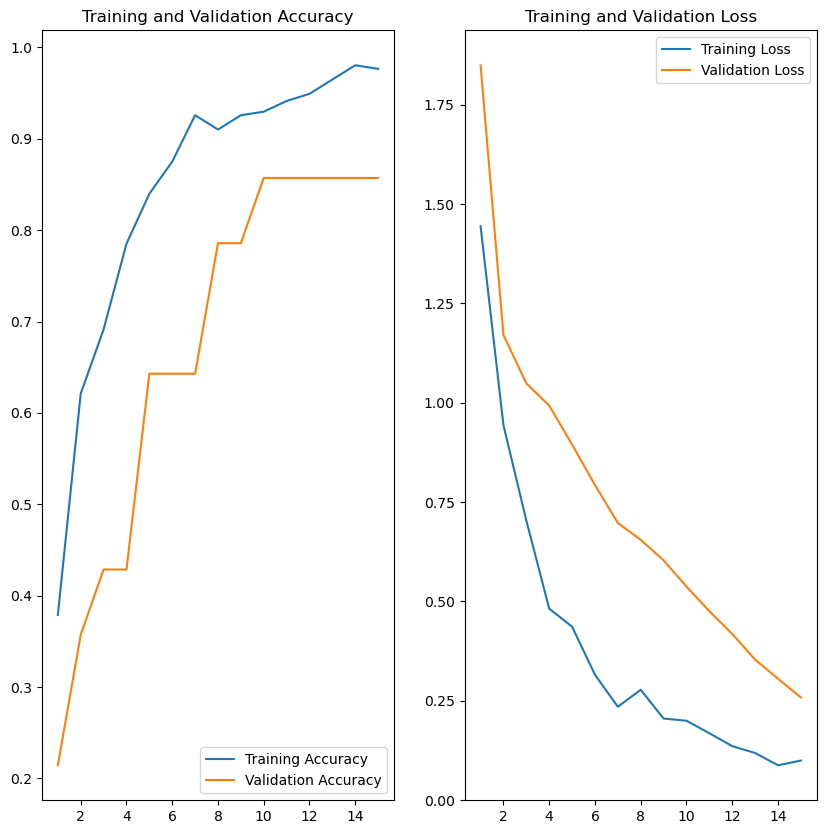

In [831]:
#buat plot dengan menggunakan history supaya jumlahnya sesuai epoch yang dilakukan
ephocs_range = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [855]:
model.save('alexnet.h5')

In [919]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

#memuat model yang sudah dilatih
model = load_model(r"C:\Users\H P\OneDrive\Documents\mldl\UAS\alexnet.h5")  # Ganti dengan path model Anda
class_names = ["Aloevera", "Echeveria", "Sedum"] #kelas yang ada pada model

#fungsi untuk mengklasifikasikan gambar dan menyimpan gambar asli
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        #memuat dan mempersiapkan gambar untuk prediksi
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180)) #membuat gambar dari path dan mnegubah ukurannya menjadi 180x180 pixel
        input_image_array = tf.keras.utils.img_to_array(input_image) #mengubah gambar jadi array numpy agar bisa di proses model
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  #menambahkan dimensi batch agar sesuai dengan input model
                                                                    #dimensi menjadi (1, 180, 180, 3)

        #melakukan prediksi
        predictions = model.predict(input_image_exp_dim) #melakukan prediksi pada gambar yang telah diproses
        result = tf.nn.softmax(predictions[0]) #menghitung hasil prediksi menggunakan softmax untuk mendapatkan probabilitas tiap kelas
        class_idx = np.argmax(result) #menemukan indeks kelas dengan probabilitas tertinggi
        confidence = np.max(result) * 100 #menghitung confidence dalam persentase

        #menampilkan hasil prediksi dan confidence
        print(f"Prediksi: {class_names[class_idx]}") #menampilkan nama kelas yang diprediksi 
        print(f"Confidence: {confidence:.2f}%") #menampilkan nilai confidence

        #menyimpan gambar asli tanpa teks
        input_image = Image.open(image_path) #membuka gambar yang ada di path
        input_image.save(save_path) #menyimpan gambar asli ke dalam path yang telah ditentukan

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

#contoh penggunaan fungsi
result = classify_images(r"C:\Users\H P\OneDrive\Documents\mldl\UAS\test_data\Echeveria\Echeveria.jpg", save_path='Echeveria.jpg')
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Prediksi: Echeveria
Confidence: 56.88%
Prediksi: Echeveria dengan confidence 56.88%. Gambar asli disimpan di Echeveria.jpg.


Found 29 files belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


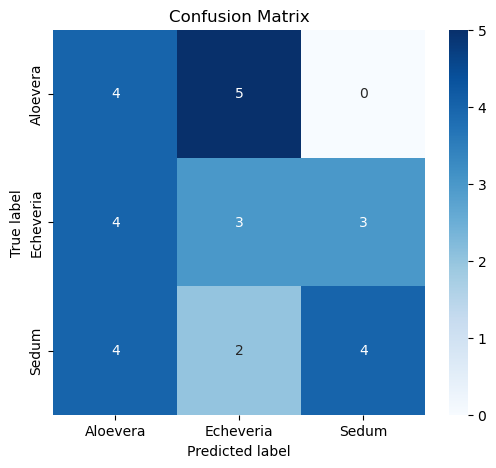

Confusion Matrix:
 [[4 5 0]
 [4 3 3]
 [4 2 4]]
Akurasi: 0.3793103448275862
Presisi: [0.33333333 0.3        0.57142857]
Recall: [0.44444444 0.3        0.4       ]
F1 Score: [0.38095238 0.3        0.47058824]


In [1033]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

# Muat data test yang sebenarnya
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\H P\OneDrive\Documents\mldl\UAS\test_data",
    labels='inferred',
    label_mode='categorical',  # Menghasilkan label dalam bentuk one-hot encoding
    batch_size=32,
    image_size=(180, 180)
)

# Prediksi model
y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)  # Konversi ke kelas prediksi

# Ekstrak label sebenarnya dari test_data dan konversi ke bentuk indeks kelas
true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())  # Konversi one-hot ke indeks kelas
true_labels = tf.convert_to_tensor(true_labels)

# Membuat matriks kebingungan
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

# Menghitung akurasi
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

# Menghitung presisi dan recall
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

# Menghitung F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Aloevera", "Echeveria", "Sedum"], yticklabels=["Aloevera", "Echeveria", "Sedum"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan hasil
print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())
